目标 9
关注 7
事情 6
艺术 6
例如 5
如果 5
那么 5
一个 5
自己 5
回复 5
学生 4
思维 4
不会 4
什么 4
不能 4
实现 4
成为 4
100 4
追求 4
梦想 4
不好 4
很多 4
放弃 4
一种 3
媒体 3
所以 3
原因 3
只有 3
这样 3
这些 3
真的 3
选择 3
行动 3
别人 3
其他 3


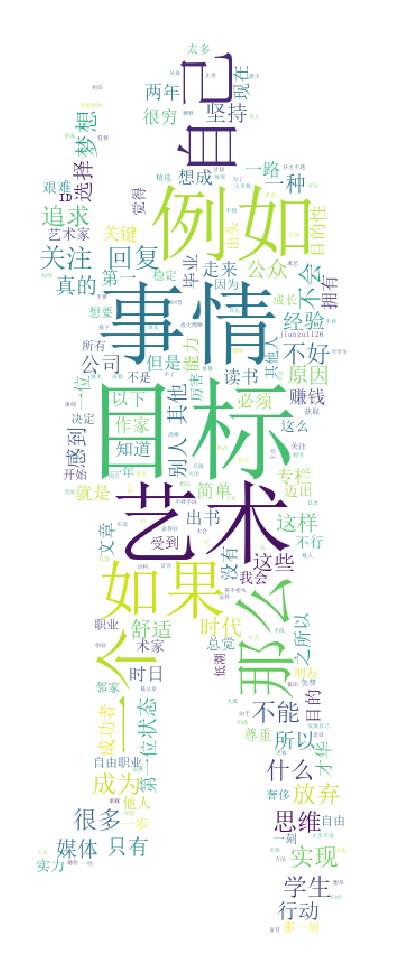

In [20]:
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
from wordcloud import WordCloud
from bs4 import BeautifulSoup
import jieba
import requests


headers={
    'User-Agent':'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/78.0.3904.108 Safari/537.36'
}

# 获取网页中的正文文本
def extract_text(url):
    page_source = requests.get(url,headers=headers).content
    bs_source = BeautifulSoup(page_source, "lxml")
    report_text = bs_source.find_all('p')
    text = ''
    for p in report_text:
        text += p.get_text()
        text += '\n'
    return text

# 词频分析
def word_frequency(text):
    from collections import Counter
    words = [word for word in jieba.cut(text, cut_all=True) if len(word) >= 2]
    c = Counter(words)
    for word_freq in c.most_common(35):
        word, freq = word_freq
        print(word, freq)

# 生成词频
url_2019 = 'https://zhuanlan.zhihu.com/p/28517714'
text_2019 = extract_text(url_2019)
word_frequency(text_2019)

# 词云分析
words = jieba.lcut(text_2019, cut_all=True)
#exclude_words = ["演讲", "演讲稿", "成功"]
for word in words:
    if word in exclude_words:
        words.remove(word)
cuted = ' '.join(words)
abel_mask = np.array(Image.open(r'a.png'))
wc = WordCloud(font_path='simsun', background_color='white', mask=abel_mask).generate(cuted)

# 作图
plt.figure(dpi=300)  # 通过分辨率放大或缩小图片
plt.imshow(wc)
plt.axis('off')
plt.show()